In [23]:

! pip install pandas geopandas shapely pyogrio pyproj packaging openpyxl matplotlib ipywidgets --quiet

In [24]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

In [44]:

df_fetility_data= pd.read_excel('../Data/IMF/imf-dm-export-20240916.xlsx', header=0)
# Using iloc to remove the first row
df_fertility_data = df_fetility_data.iloc[1:-2]

df_fertility_data = df_fertility_data.rename(columns={'General Government Debt (Percent of GDP)':'Country'}).reset_index(drop=True)
# Replace "no data" with 0
df_fertitlity_data = df_fertility_data.transpose()
df_fertility_data.head()

,Country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,70.391063,71.992300,73.716336,73.324410,71.894783,69.472044,67.367670,75.926873,73.877756,67.581205
1,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,30.484850,34.045452,37.751735,40.593482,41.180764,41.762470,46.744039,57.115015,57.575566,55.701839
2,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,81.011265,83.757940,84.401089,82.548609,78.603451,74.073811,70.639707,82.930030,82.275804,77.786411
3,Belarus,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,36.859473,38.790605,53.006888,53.481630,53.159846,47.515236,40.999215,47.493317,41.182010,39.752693
4,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,105.485644,107.040873,105.230356,105.005290,102.020222,99.854364,97.617232,112.035422,109.192693,105.270422


In [45]:
df_fertility_data.dtypes

Country     object
1950        object
1951        object
1952        object
1953        object
            ...   
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
Length: 74, dtype: object

In [56]:
world_map_data = gpd.read_file('../Data/world_map_data/110m/ne_110m_geography_regions_polys.shp')
geojson = json.loads(world_map_data.to_json())
geojson['features'][0]


{'id': '0',
 'type': 'Feature',
 'properties': {'FEATURECLA': 'Continent',
  'NAME': 'SOUTH AMERICA',
  'NAMEALT': None,
  'REGION': 'South America',
  'SUBREGION': None,
  'MIN_LABEL': 0.0,
  'MAX_LABEL': 4.0,
  'SCALERANK': 0,
  'LABEL': 'SOUTH AMERICA',
  'WIKIDATAID': 'Q18',
  'NAME_AR': 'أمريكا الجنوبية',
  'NAME_BN': 'দক্ষিণ আমেরিকা',
  'NAME_DE': 'Südamerika',
  'NAME_EN': 'South America',
  'NAME_ES': 'América del Sur',
  'NAME_FR': 'Amérique du Sud',
  'NAME_EL': 'Νότια Αμερική',
  'NAME_HI': 'दक्षिण अमेरिका',
  'NAME_HU': 'Dél-Amerika',
  'NAME_ID': 'Amerika Selatan',
  'NAME_IT': 'America meridionale',
  'NAME_JA': '南アメリカ',
  'NAME_KO': '남아메리카',
  'NAME_NL': 'Zuid-Amerika',
  'NAME_PL': 'Ameryka Południowa',
  'NAME_PT': 'América do Sul',
  'NAME_RU': 'Южная Америка',
  'NAME_SV': 'Sydamerika',
  'NAME_TR': 'Güney Amerika',
  'NAME_VI': 'Nam Mỹ',
  'NAME_ZH': '南美洲',
  'NE_ID': 1159104361,
  'NAME_FA': 'آمریکای جنوبی',
  'NAME_HE': 'אמריקה הדרומית',
  'NAME_UK': 'Південна Аме

In [53]:
# Merge the fertility data with the world map data
merged_data = world_map_data.merge(df_fertility_data, left_on='NAME', right_on='Country', how='left')


# Add columns for all of the data to the world_map_data
for column in df_fertility_data.columns:
    if column not in world_map_data.columns:
        world_map_data[column] = merged_data[column]

world_map_data

,FEATURECLA,NAME,NAMEALT,REGION,SUBREGION,MIN_LABEL,MAX_LABEL,SCALERANK,LABEL,WIKIDATAID,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Continent,SOUTH AMERICA,None,South America,None,0.0,4.0,0,SOUTH AMERICA,Q18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Continent,AUSTRALIA,None,Oceania,Australasia,0.0,3.0,0,AUSTRALIA,Q3960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Continent,AFRICA,None,Africa,None,0.0,4.0,0,AFRICA,Q15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Continent,ANTARCTICA,None,Antarctica,None,0.0,4.0,0,None,Q51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Continent,ASIA,None,Asia,None,0.0,4.0,0,ASIA,Q48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Continent,EUROPE,None,Europe,None,0.0,4.0,0,EUROPE,Q46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Continent,NORTH AMERICA,None,North America,None,0.0,4.0,0,NORTH AMERICA,Q49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Island group,MELANESIA,None,Oceania,Melanesia,3.0,6.0,0,None,Q37394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Island group,MICRONESIA,None,Oceania,Micronesia,3.0,6.0,0,None,Q3359409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Island group,POLYNESIA,None,Oceania,Polynesia,2.0,6.0,0,None,Q35942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:

# Function to update the plot based on the selected year
def update_plot(year):
    # Merge the fertility data with the world map data
    merged_data = world_map_data.merge(df_fertility_data, left_on='NAME', right_index=True)

    # Plot the merged data
    _, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(column=str(year), ax=ax, legend=True, legend_kwds={'label': "Fertility Rate by Country", 'orientation': "horizontal"})
    plt.title(f'Fertility Rate in {year}')
    plt.show()

# Create a slider for the year
try:
    year_slider = widgets.IntSlider(min=1950, max=2022, step=1, value=1950, description='Year')
except:
    print("Error creating the slider")

# Use the interact function to create the interactive plot
interact(update_plot, year=year_slider)

interactive(children=(IntSlider(value=1950, description='Year', max=2022, min=1950), Output()), _dom_classes=(…

<function __main__.update_plot(year)>

In [36]:
world_map_data.head()


,FEATURECLA,NAME,NAMEALT,REGION,SUBREGION,MIN_LABEL,MAX_LABEL,SCALERANK,LABEL,WIKIDATAID,...,NAME_TR,NAME_VI,NAME_ZH,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,geometry
0,Continent,SOUTH AMERICA,None,South America,None,0.0,4.0,0,SOUTH AMERICA,Q18,...,Güney Amerika,Nam Mỹ,南美洲,1159104361,آمریکای جنوبی,אמריקה הדרומית,Південна Америка,جنوبی امریکا,南美洲,"MULTIPOLYGON (((-67.96526 10.47523, -67.9314 1..."
1,Continent,AUSTRALIA,None,Oceania,Australasia,0.0,3.0,0,AUSTRALIA,Q3960,...,Avustralya,Châu Úc,澳大利亞洲,1159104363,استرالیا,אוסטרליה,Австралія,براعظم آسٹریلیا,澳大利亞洲,"MULTIPOLYGON (((116.21709 -34.86582, 115.98672..."
2,Continent,AFRICA,None,Africa,None,0.0,4.0,0,AFRICA,Q15,...,Afrika,châu Phi,非洲,1159104365,آفریقا,אפריקה,Африка,افریقا,非洲,"MULTIPOLYGON (((10.64051 36.89741, 10.64092 36..."
3,Continent,ANTARCTICA,None,Antarctica,None,0.0,4.0,0,None,Q51,...,Antarktika,Châu Nam Cực,南極洲,1159104367,جنوبگان,אנטארקטיקה,Антарктида,انٹارکٹکا,南極洲,"MULTIPOLYGON (((-60.82007 -68.77842, -60.89404..."
4,Continent,ASIA,None,Asia,None,0.0,4.0,0,ASIA,Q48,...,Asya,châu Á,亞洲,1159104597,آسیا,אסיה,Азія,ایشیا,亞洲,"MULTIPOLYGON (((-180 68.98345, -179.99995 68.9..."


In [17]:
# Merge the fertility data with the world map data
merged_data = world_map_data.merge(df_fertility_data, left_on='id', right_on='Year', how='left')


KeyError: 'Year'

NameError: name 'merged_data' is not defined

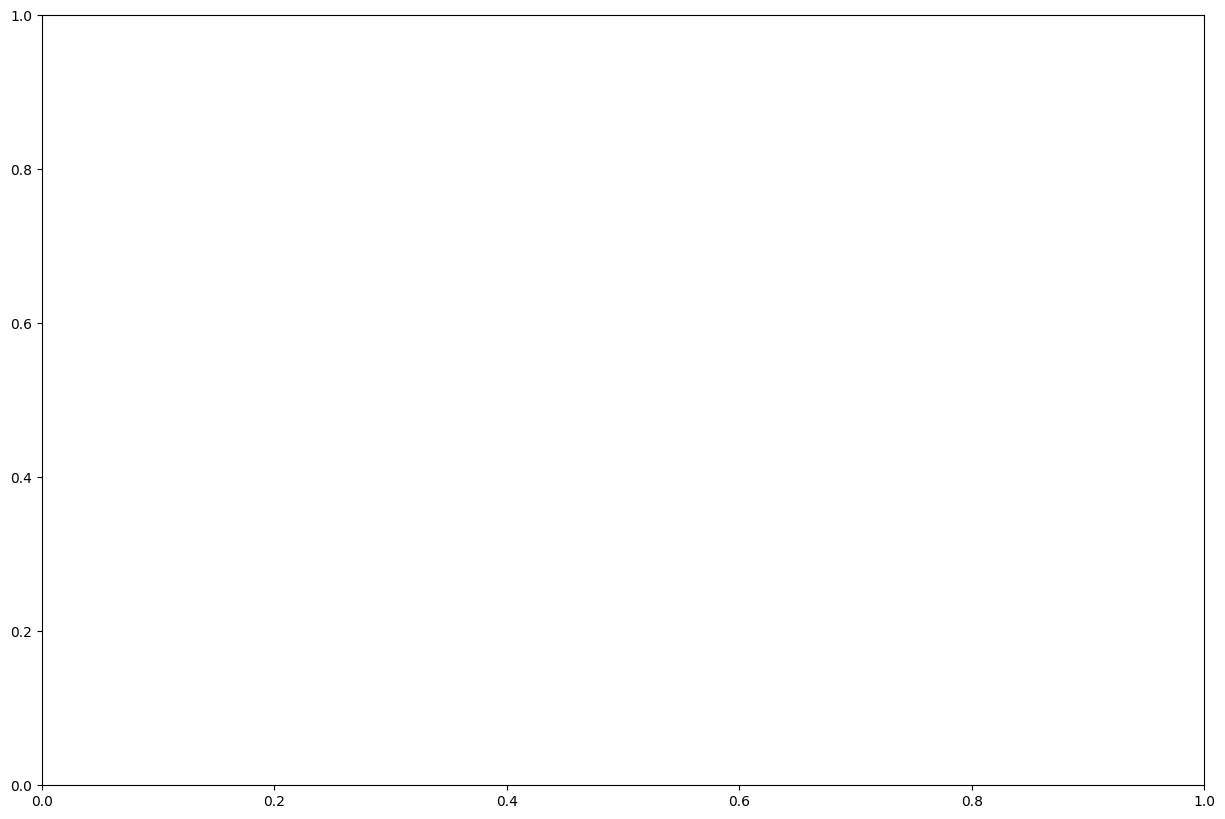

In [18]:

# Plot the merged data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='2022', ax=ax, legend=True, legend_kwds={'label': "Fertility Rate by Country", 'orientation': "horizontal"})
plt.title('Fertility Rate in 2022')
plt.show()

In [113]:
merged_data

NameError: name 'merged_data' is not defined